In [1]:
from __future__ import division
import numpy as np
import scipy
from scipy import integrate
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [30]:
#set up function
def harmonic(y, t, param):
    k, En = param
    
    y1 = y[1]
    y2 = ((0.05*y[0]**3)+(k-En))*y[0]
    return [y1, y2]

In [31]:
def sol_frame(start, stop, delta):
    pts = int(1 + ((stop - start) / delta))
    frame = np.linspace(start, stop, pts)
    return frame

In [41]:
#define constants
tol = 10**-4
k = 1
xp = [-2,2]
A = 0.5
y0 = [0,A]

En_start = k
En = En_start

# Pack up the parameters and initial conditions:
p = [k, En]
y0 = [0,A]

#define x range for eig_funct
x_frame = sol_frame(xp[0], xp[1], 0.1)

eig_funct = []
eig_vals = []

for i in range(1,6):
    dEn = k/100
    En = En + dEn
    #loop through and find solution
    for j in range(1, 1000):
        #reset En
        p = [k, En]
        #solve ODE
        sol = integrate.odeint(harmonic, y0, x_frame, args=(p,))

        #pull end value
        end = len(sol)
        end_val = sol[end-1:end, 0:1]

        #check if solution is within tolerance
        if abs(end_val) < tol:
            En
            print('found solution on iteration:')
            print j
            break;

        if i % 2 == 0:
            if end_val < 0:
                En = En+dEn
            else:
                En = En-dEn/2
                dEn = dEn/2
        else:
            if end_val > 0:
                En = En+dEn
            else:
                En = En-dEn/2
                dEn = dEn/2
                
    y1a = sol[:,0:1]
    y2a = sol[:,1:2]
    
    #append eigen function to list
    eig_funct.append(y1a)
    #append Eigen value
    eig_vals.append(En)

#write out solution
A1 = eig_funct[0]
np.savetxt('A1.dat', A1)

A2 = eig_funct[1]
np.savetxt('A2.dat', A2)

A3 = eig_funct[2]
np.savetxt('A3.dat', A3)

A4 = eig_funct[3]
np.savetxt('A4.dat', A4)

A5 = eig_funct[4]
np.savetxt('A5.dat', A5)

A6 = np.r_[eig_vals[0],eig_vals[1],eig_vals[2],eig_vals[3],eig_vals[4]]
np.savetxt('A6.dat', A6)

found solution on iteration:
73
found solution on iteration:
190
found solution on iteration:
315
found solution on iteration:
435
found solution on iteration:
558


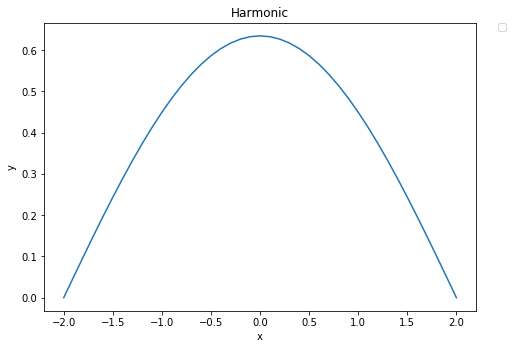

In [42]:
#create figure object
fig = plt.figure()

#plot each set of y values with respect to time
ax = fig.add_axes([0,0,1,1])

ax.plot(x_frame, A1, label = '')
#ax.plot(x_frame,y2a, label = '')

#title axis
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Harmonic')

#include legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

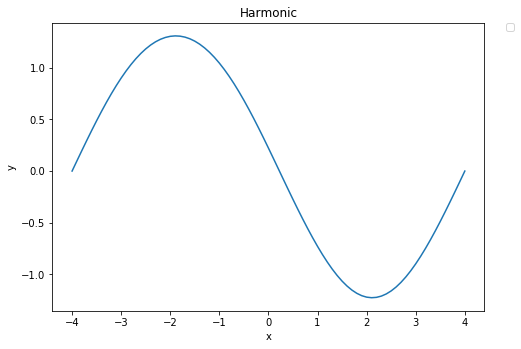

In [34]:
#create figure object
fig = plt.figure()

#plot each set of y values with respect to time
ax = fig.add_axes([0,0,1,1])

ax.plot(x_frame, A2, label = '')
#ax.plot(x_frame,y2a, label = '')

#title axis
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Harmonic')

#include legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

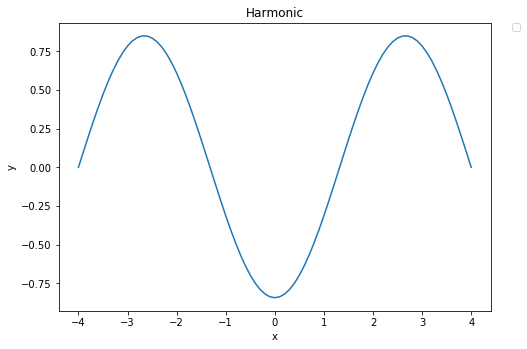

In [35]:
#create figure object
fig = plt.figure()

#plot each set of y values with respect to time
ax = fig.add_axes([0,0,1,1])

ax.plot(x_frame, A3, label = '')
#ax.plot(x_frame,y2a, label = '')

#title axis
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Harmonic')

#include legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

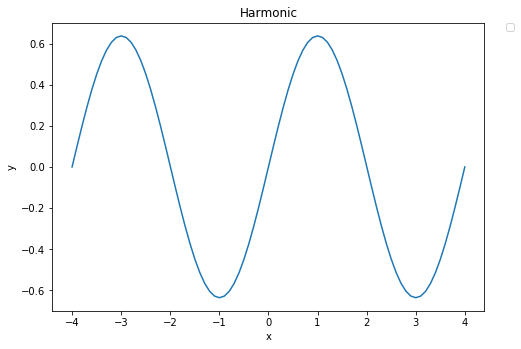

In [36]:
#create figure object
fig = plt.figure()

#plot each set of y values with respect to time
ax = fig.add_axes([0,0,1,1])

ax.plot(x_frame, A4, label = '')
#ax.plot(x_frame,y2a, label = '')

#title axis
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Harmonic')

#include legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

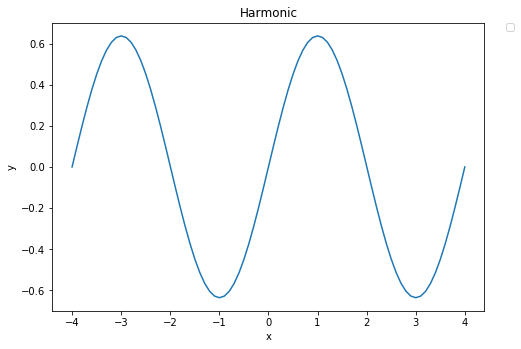

In [37]:
#create figure object
fig = plt.figure()

#plot each set of y values with respect to time
ax = fig.add_axes([0,0,1,1])

ax.plot(x_frame, A4, label = '')
#ax.plot(x_frame,y2a, label = '')

#title axis
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Harmonic')

#include legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()